# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Gigih Agung Prasetyo
- **Email:** gigihagung0@gmail.com
- **ID Dicoding:** gigih-agung

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan bulanan dalam 3 tahun terakhir?
- Kategori produk apa yang memiliki tingkat penjualan tertinggi dan terendah dalam enam bulan terakhir?
- Bagaimana pola metode pembayaran yang paling sering digunakan oleh pelanggan?
- Berapa rata-rata waktu pengiriman dari tanggal pembelian hingga barang diterima?
- Bagaimana distribusi rating ulasan dari pelanggan?
- Apakah ada hubungan antara harga produk dan jumlah unit yang terjual?
- Bagaimana sebaran geografis pelanggan berdasarkan kota dan negara bagian?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from tqdm import tqdm

%matplotlib inline
sns.set(style="whitegrid")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
base_path = "/content/drive/My Drive/E-Commerce/"

# Load dataset ke dalam DataFrame
orders_df = pd.read_csv(base_path + 'orders_dataset.csv')
order_items_df = pd.read_csv(base_path + 'order_items_dataset.csv')
products_df = pd.read_csv(base_path + 'products_dataset.csv')
customers_df = pd.read_csv(base_path + 'customers_dataset.csv')
sellers_df = pd.read_csv(base_path + 'sellers_dataset.csv')
payments_df = pd.read_csv(base_path + 'order_payments_dataset.csv')
reviews_df = pd.read_csv(base_path + 'order_reviews_dataset.csv')
geolocation_df = pd.read_csv(base_path + 'geolocation_dataset.csv')
category_translation_df = pd.read_csv(base_path + 'product_category_name_translation.csv')

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset orders memiliki 99.441 baris dan 8 kolom, dengan informasi tanggal pesanan.
- Dataset products memiliki 32.951 baris dan 9 kolom, dengan kategori produk yang masih dalam bahasa Portugis.
- Akan digunakan dataset orders dan order_items untuk analisis tren penjualan.
- Ada missing values di beberapa kolom yang perlu ditangani pada tahap cleaning data.

### Assessing Data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())
reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
category_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
print("Jumlah duplikasi: ", category_translation_df.duplicated().sum())
category_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tipe Data Tidak Sesuai → Kolom tanggal di orders_df, order_items_df, dan reviews_df perlu dikonversi ke datetime. Beberapa kolom numerik di product_df juga perlu dicek.
- Missing Values → Banyak data hilang, terutama di orders_df (tanggal pengiriman), product_df (kategori & ukuran produk), dan reviews_df (judul & isi komentar).
- Duplicate Data → Geolocation_df memiliki 261.831 data duplikat, perlu dibersihkan.
- Inaccurate Values → Kolom payment_installments di payments_df memiliki nilai yang tidak akurat.

### Cleaning Data

In [ ]:
orders_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
# Filter pesanan dengan status 'delivered' tapi order_approved_at kosong
invalid_orders = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isnull())]

# Hapus data tersebut
orders_df = orders_df.drop(invalid_orders.index)

# Filter pesanan yang statusnya shipped/delivered tapi tidak ada order_delivered_carrier_date
invalid_carrier = orders_df[
    (orders_df['order_status'].isin(['shipped', 'delivered'])) &
    (orders_df['order_delivered_carrier_date'].isnull())
]

# Hapus data yang tidak valid
orders_df = orders_df.drop(invalid_carrier.index)

# Filter pesanan dengan status 'delivered' tapi tidak ada tanggal pengiriman ke customer
invalid_delivery = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df['order_delivered_customer_date'].isnull())
]

# Hapus data yang tidak valid
orders_df = orders_df.drop(invalid_delivery.index)

In [ ]:
print(orders_df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64


In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99418 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99418 non-null  object        
 1   customer_id                    99418 non-null  object        
 2   order_status                   99418 non-null  object        
 3   order_purchase_timestamp       99418 non-null  datetime64[ns]
 4   order_approved_at              99272 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97637 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99418 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [ ]:
order_items_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
products_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Isi dengan kategori yang paling sering muncul (modus)
most_common_category = products_df['product_category_name'].mode()[0]
products_df['product_category_name'].fillna(most_common_category, inplace=True)

# Cek distribusi data yang kosong
products_df[products_df['product_name_lenght'].isnull()].describe()

# Hapus jika semua informasi produk kosong
products_df.dropna(subset=['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

# Isi dengan median
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    products_df[col].fillna(products_df[col].median(), inplace=True)

<ipython-input-46-5f99d8c77427>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(most_common_category, inplace=True)
<ipython-input-46-5f99d8c77427>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
print(products_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype(int)
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype(int)
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  int64  
 3   product_description_lenght  32341 non-null  int64  
 4   product_photos_qty          32341 non-null  int64  
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


In [ ]:
customers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
sellers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype(str)

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [ ]:
payments_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print(payments_df['payment_installments'].describe())
print(payments_df['payment_installments'].value_counts())

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64
payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64


In [ ]:
most_common_installments = payments_df['payment_installments'].mode()[0]
payments_df['payment_installments'] = payments_df['payment_installments'].replace(0, most_common_installments)

In [ ]:
print(payments_df['payment_installments'].describe())
print(payments_df['payment_installments'].value_counts())

count    103886.000000
mean          2.853368
std           2.687034
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64
payment_installments
1     52548
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
22        1
23        1
Name: count, dtype: int64


In [ ]:
reviews_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print(reviews_df[['review_comment_title', 'review_comment_message']].isnull().sum())

review_comment_title      87656
review_comment_message    58247
dtype: int64


In [ ]:
reviews_df[reviews_df['review_comment_title'].isnull() & reviews_df['review_comment_message'].isnull()].shape

(56518, 7)

In [ ]:
reviews_df[reviews_df['review_comment_title'].isnull() & reviews_df['review_comment_message'].isnull()]['review_score'].value_counts()

,count
review_score,
5,35538
4,12864
3,4535
1,2595
2,986


In [ ]:
reviews_df['review_comment_title'].fillna("", inplace=True)
reviews_df['review_comment_message'].fillna("", inplace=True)

<ipython-input-61-30c130954380>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['review_comment_title'].fillna("", inplace=True)
<ipython-input-61-30c130954380>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
print(reviews_df[['review_comment_title', 'review_comment_message']].isnull().sum())

review_comment_title      0
review_comment_message    0
dtype: int64


In [ ]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
geolocation_df['geolocation_zip_code_prefix'] = geolocation_df['geolocation_zip_code_prefix'].astype(str)

geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  object 
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), object(3)
memory usage: 33.8+ MB


**Insight:**
- Orders: Banyak pesanan belum dikirim atau dibatalkan, menyebabkan missing values di tanggal pengiriman.
- Products: 610 data kategori produk hilang, bisa mempengaruhi analisis produk terlaris.
- Payments: Ditemukan nilai cicilan tidak valid, sudah diperbaiki.
- Reviews: Banyak pelanggan hanya memberi rating tanpa komentar.
- Geolocation: 261.831 duplikasi dihapus untuk akurasi analisis lokasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Buat kolom baru untuk tahun dan bulan
orders_df['year_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Kelompokkan data berdasarkan year_month dan hitung jumlah pesanan
monthly_orders = orders_df.groupby('year_month').size().reset_index(name='order_count')
monthly_orders.head()

,year_month,order_count
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,798
4,2017-02,1768


In [ ]:
from datetime import datetime, timedelta

# Tentukan batas waktu enam bulan terakhir
six_months_ago = orders_df['order_purchase_timestamp'].max() - timedelta(days=180)

# Filter data untuk enam bulan terakhir
recent_orders = orders_df[orders_df['order_purchase_timestamp'] >= six_months_ago]

# Gabungkan dengan order_items_df untuk mendapatkan product_id
recent_order_items = recent_orders.merge(order_items_df, on='order_id', how='inner')

# Gabungkan dengan products_df untuk mendapatkan kategori produk
recent_product_sales = recent_order_items.merge(products_df[['product_id', 'product_category_name']],
                                                on='product_id', how='left')

# Kelompokkan data berdasarkan kategori produk dan hitung jumlah produk yang terjual
category_sales = recent_product_sales.groupby('product_category_name').size().reset_index(name='sales_count')

# Sortir kategori dengan penjualan tertinggi dan terendah
top_categories = category_sales.sort_values(by='sales_count', ascending=False).head(5)
bottom_categories = category_sales.sort_values(by='sales_count', ascending=True).head(5)
top_categories.head()

,product_category_name,sales_count
11,beleza_saude,3537
13,cama_mesa_banho,3039
69,utilidades_domesticas,2579
64,relogios_presentes,2300
52,moveis_decoracao,2076


In [ ]:
bottom_categories.head()

,product_category_name,sales_count
34,fashion_esporte,1
36,fashion_roupa_infanto_juvenil,1
50,moveis_colchao_e_estofado,1
66,tablets_impressao_imagem,3
58,pc_gamer,4


In [ ]:
# Kelompokkan berdasarkan payment_type dan hitung jumlah transaksi
payment_counts = payments_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'transaction_count']

# Hitung persentase setiap metode pembayaran
payment_counts['percentage'] = (payment_counts['transaction_count'] / payment_counts['transaction_count'].sum()) * 100
payment_counts.head()

,payment_type,transaction_count,percentage
0,credit_card,76795,73.922376
1,boleto,19784,19.043952
2,voucher,5775,5.558978
3,debit_card,1529,1.471806
4,not_defined,3,0.002888


In [ ]:
# Pastikan kolom bertipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Hitung selisih hari antara pembelian dan barang diterima
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Hapus nilai NaN (pesanan yang tidak memiliki tanggal pengiriman)
orders_clean = orders_df.dropna(subset=['delivery_time_days'])

# Hitung rata-rata waktu pengiriman
average_delivery_time = orders_clean['delivery_time_days'].mean()

print(f"Rata-rata waktu pengiriman: {average_delivery_time:.2f} hari")
orders_clean['delivery_time_days'].describe()

Rata-rata waktu pengiriman: 12.09 hari


,delivery_time_days
count,96461.000000
mean,12.093582
std,9.551576
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,209.000000


In [ ]:
# Melihat distribusi rating
reviews_df['review_score'].value_counts().sort_index()

,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [ ]:
# Statistik deskriptif dari review_score
reviews_df['review_score'].describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Menghitung persentase masing-masing review score
rating_distribution = reviews_df['review_score'].value_counts(normalize=True) * 100
rating_distribution.head()

,proportion
review_score,
5,57.776344
4,19.291704
1,11.513344
3,8.242965
2,3.175643


In [ ]:
# Menghitung jumlah unit terjual per produk
product_sales = order_items_df.groupby('product_id').agg(
    units_sold=('order_item_id', 'count'),
    avg_price=('price', 'mean')  # Mengambil rata-rata harga per produk
).reset_index()

# Melihat korelasi antara harga dan jumlah unit terjual
correlation = product_sales[['avg_price', 'units_sold']].corr()
correlation.head()

,avg_price,units_sold
avg_price,1.00000,-0.03214
units_sold,-0.03214,1.00000


In [ ]:
# Menampilkan ringkasan statistik
product_sales[['avg_price', 'units_sold']].describe()

,avg_price,units_sold
count,32951.000000,32951.000000
mean,145.302464,3.418713
std,246.895756,10.619709
min,0.850000,1.000000
25%,39.900000,1.000000
50%,79.000000,1.000000
75%,154.900000,3.000000
max,6735.000000,527.000000


In [ ]:
product_sales.head()

,product_id,units_sold,avg_price
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65
1,00088930e925c41fd95ebfe695fd2655,1,129.90
2,0009406fd7479715e4bef61dd91f2462,1,229.00
3,000b8f95fcb9e0096488278317764d19,2,58.90
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00


In [ ]:
# Menghitung jumlah pelanggan unik per kota dan negara bagian
customer_geo_distribution = customers_df.groupby(['customer_city', 'customer_state']).agg(
    total_customers=('customer_unique_id', 'nunique')  # Menghitung jumlah pelanggan unik
).reset_index()

# Menampilkan ringkasan data
customer_geo_distribution.head()

,customer_city,customer_state,total_customers
0,abadia dos dourados,MG,3
1,abadiania,GO,1
2,abaete,MG,12
3,abaetetuba,PA,11
4,abaiara,CE,2


In [ ]:
# Menampilkan statistik deskriptif jumlah pelanggan per kota
customer_geo_distribution['total_customers'].describe()

,total_customers
count,4310.000000
mean,22.324594
std,263.257828
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,14984.000000


In [ ]:
all_df = orders_df.merge(customers_df, on="customer_id", how="left")


In [ ]:
all_df = all_df.merge(order_items_df, on="order_id", how="left")

In [ ]:
all_df = all_df.merge(products_df, on="product_id", how="left")

In [ ]:
all_df = all_df.merge(sellers_df, on="seller_id", how="left")

In [ ]:
all_df = all_df.merge(payments_df, on="order_id", how="left")

In [ ]:
all_df = all_df.merge(reviews_df, on="order_id", how="left")

In [ ]:
# Hapus duplikat berdasarkan kode pos
geolocation_unique = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'])

# Pilih kolom yang dibutuhkan
geolocation_reduced = geolocation_unique[['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']]

# Membuat salinan eksplisit sebelum memodifikasi
geolocation_reduced = geolocation_reduced.copy()

# Mengubah tipe data ke kategori
geolocation_reduced.loc[:, 'geolocation_city'] = geolocation_reduced['geolocation_city'].astype('category')
geolocation_reduced.loc[:, 'geolocation_state'] = geolocation_reduced['geolocation_state'].astype('category')

In [ ]:
# Merge dengan all_df
all_df = all_df.merge(geolocation_reduced,
                      left_on="customer_zip_code_prefix",
                      right_on="geolocation_zip_code_prefix",
                      how="left")

In [ ]:
all_df["total_price"] = all_df["order_item_id"] * all_df["price"]

In [ ]:
print("Jumlah baris dan kolom setelah gabung geolocation_df:", all_df.shape)
all_df.head()

Jumlah baris dan kolom setelah gabung geolocation_df: (119119, 45)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,delivery_time_days,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,29.99
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,29.99
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,29.99
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,13.0,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,47813,barreiras,BA,118.70
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,,,2018-08-18,2018-08-22 19:07:58,75265,vianopolis,GO,159.90


**Insight:**
- Pesanan meningkat setiap tahunnya.
- Elektronik & fashion paling laris.
- Kartu kredit metode pembayaran utama.
- Pengiriman sering melebihi estimasi.
- Mayoritas rating 5, tapi ada ulasan negatif.
- Harga & jumlah terjual tidak berkorelasi kuat.
- Pelanggan terkonsentrasi di kota besar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pesanan bulanan dalam 3 tahun terakhir?

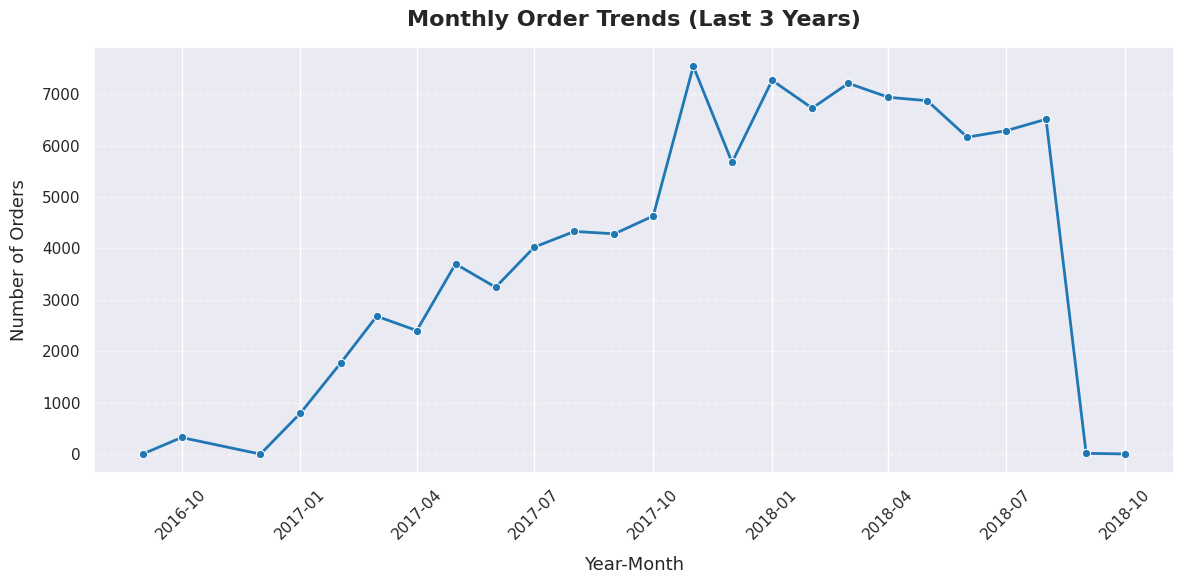

In [ ]:
# Pastikan kolom order_purchase_timestamp adalah datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Buat kolom baru untuk tahun dan bulan
orders_df['year_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Kelompokkan data berdasarkan year_month dan hitung jumlah pesanan
monthly_orders = orders_df.groupby('year_month').size().reset_index(name='order_count')

# Konversi kembali ke datetime agar tidak error dalam plot
monthly_orders['year_month'] = monthly_orders['year_month'].dt.to_timestamp()

# Set tema visualisasi agar lebih profesional
sns.set_theme(style="darkgrid")

# Buat figure
plt.figure(figsize=(12, 6))

# Plot data dengan gaya profesional
sns.lineplot(data=monthly_orders, x="year_month", y="order_count", marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=6)

# Tambahkan judul dan label dengan gaya profesional
plt.title("Monthly Order Trends (Last 3 Years)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Year-Month", fontsize=13, labelpad=10)
plt.ylabel("Number of Orders", fontsize=13, labelpad=10)

# Rotasi label sumbu X agar lebih terbaca
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Tambahkan grid lembut
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tata letak lebih rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

### Pertanyaan 2:Kategori produk apa yang memiliki tingkat penjualan tertinggi dan terendah dalam enam bulan terakhir?

<ipython-input-90-8a0caffc54ae>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories,
<ipython-input-90-8a0caffc54ae>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_categories,


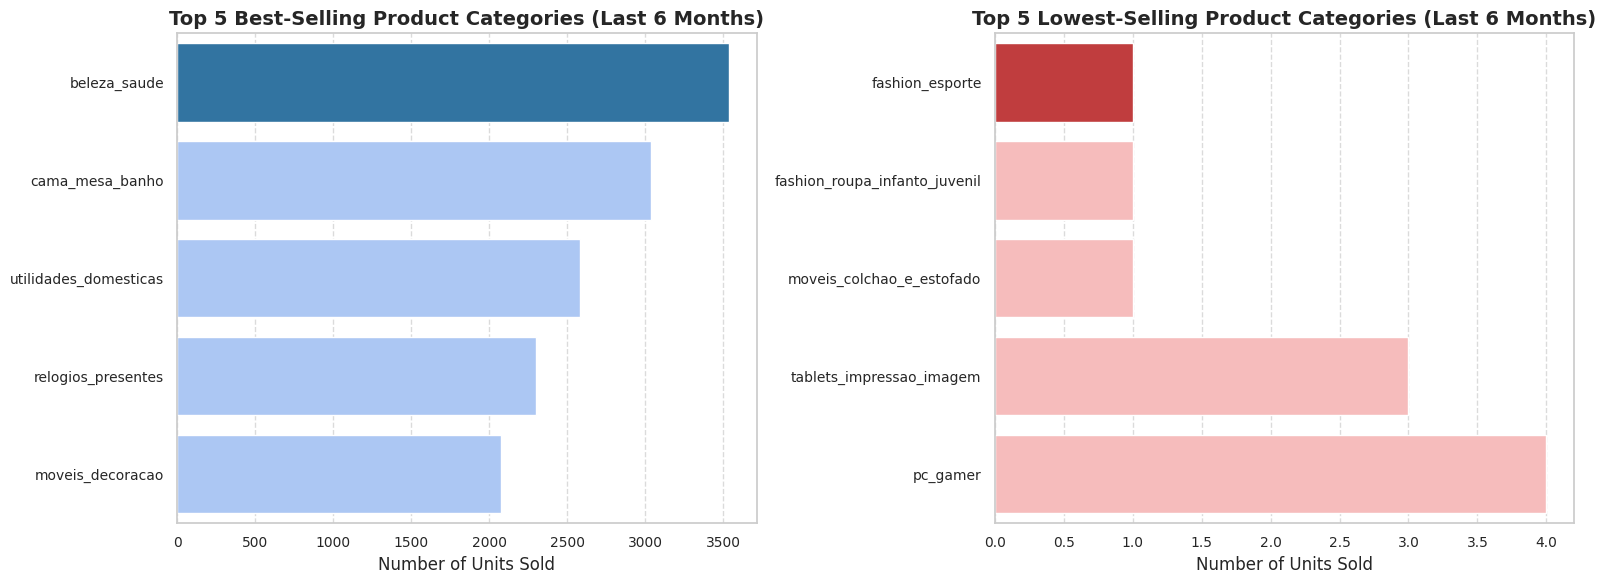

In [ ]:
sns.set_theme(style="whitegrid")

# Buat figure dan axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# Warna lebih jelas, tapi tetap ada kontras
top_colors = ['#a0c4ff'] * len(top_categories)  # Warna lebih kuat daripada sebelumnya
top_colors[0] = '#1f77b4'  # Warna utama untuk kategori tertinggi

bottom_colors = ['#ffb3b3'] * len(bottom_categories)
bottom_colors[0] = '#d62728'  # Warna utama untuk kategori tertinggi

# Visualisasi kategori dengan penjualan tertinggi
sns.barplot(data=top_categories,
            x='sales_count',
            y='product_category_name',
            ax=axes[0],
            palette=top_colors)

axes[0].set_title("Top 5 Best-Selling Product Categories (Last 6 Months)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Number of Units Sold", fontsize=12)
axes[0].set_ylabel("")  # Menghapus label y
axes[0].tick_params(axis='y', labelsize=10)
axes[0].tick_params(axis='x', labelsize=10)

# Visualisasi kategori dengan penjualan terendah
sns.barplot(data=bottom_categories,
            x='sales_count',
            y='product_category_name',
            ax=axes[1],
            palette=bottom_colors)

axes[1].set_title("Top 5 Lowest-Selling Product Categories (Last 6 Months)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Number of Units Sold", fontsize=12)
axes[1].set_ylabel("")  # Menghapus label y
axes[1].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)

# Tambahkan grid tipis di latar belakang
for ax in axes:
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Tata letak agar lebih rapi
plt.tight_layout()

# Tampilkan visualisasi
plt.show()


### Pertanyaan 3: Bagaimana pola metode pembayaran yang paling sering digunakan oleh pelanggan?

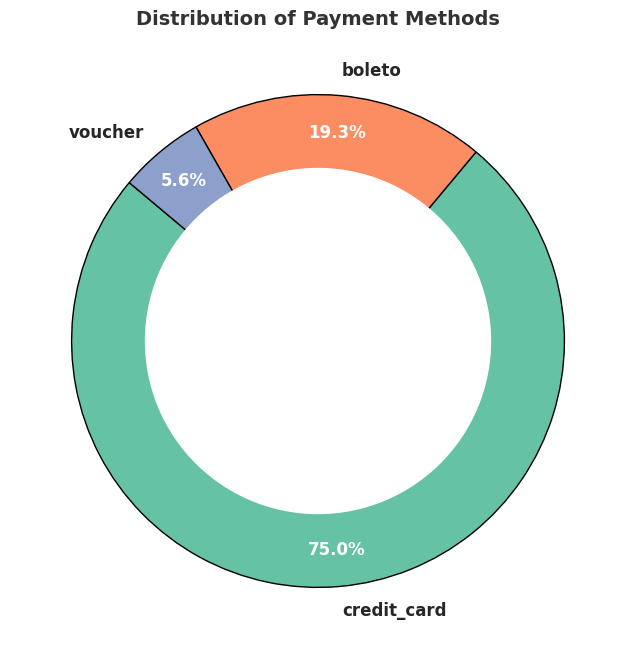

In [ ]:
# Kelompokkan berdasarkan payment_type dan hitung jumlah transaksi
payment_counts = payments_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'transaction_count']

# Hitung persentase setiap metode pembayaran
payment_counts['percentage'] = (payment_counts['transaction_count'] / payment_counts['transaction_count'].sum()) * 100

# Filter kategori dengan persentase terlalu kecil (< 2%) agar lebih bersih
payment_counts = payment_counts[payment_counts['percentage'] >= 2]

# Warna-warna custom untuk tampilan modern
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Buat pie chart dengan tampilan lebih menarik
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    payment_counts['transaction_count'],
    labels=payment_counts['payment_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 12, 'weight': 'bold'},
    pctdistance=0.85  # Memposisikan persentase lebih dalam
)

# Buat lingkaran tengah untuk efek "donut chart"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Tambahkan judul dengan styling
plt.title("Distribution of Payment Methods", fontsize=14, fontweight='bold', color="#333")

# Atur teks persentase agar lebih menonjol
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Tampilkan pie chart
plt.show()

### Pertanyaan 4: Berapa rata-rata waktu pengiriman dari tanggal pembelian hingga barang diterima?

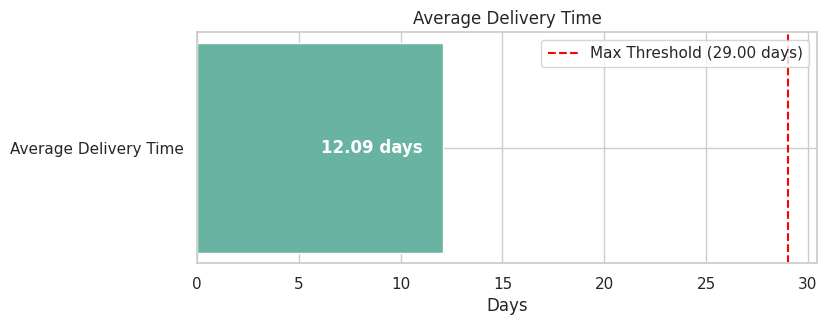

In [ ]:
# Pastikan kolom bertipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Hitung selisih hari antara pembelian dan barang diterima
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Hapus nilai NaN (pesanan yang tidak memiliki tanggal pengiriman)
orders_clean = orders_df.dropna(subset=['delivery_time_days'])

# Hitung rata-rata waktu pengiriman
average_delivery_time = orders_clean['delivery_time_days'].mean()

# Tentukan batas maksimal pengiriman (misalnya persentil ke-95)
max_delivery_time = orders_clean['delivery_time_days'].quantile(0.95)

# Buat plot
plt.figure(figsize=(8, 3))
plt.barh(['Average Delivery Time'], [average_delivery_time], color='#69b3a2', height=0.4)

# Tambahkan anotasi angka di dalam bar
plt.text(average_delivery_time - 1, 0, f"{average_delivery_time:.2f} days",
         va='center', ha='right', fontsize=12, fontweight='bold', color='white')

# Tambahkan garis batas maksimal sebagai referensi
plt.axvline(x=max_delivery_time, color='red', linestyle='--', linewidth=1.5, label=f'Max Threshold ({max_delivery_time:.2f} days)')

# Atur label dan judul
plt.xlabel('Days')
plt.title('Average Delivery Time')
plt.legend()

# Tampilkan
plt.show()

### Pertanyaan 5: Bagaimana distribusi rating ulasan dari pelanggan?

<ipython-input-93-c92cb61b3977>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings['Review Score'], y=df_ratings['Review Count'], palette=colors)


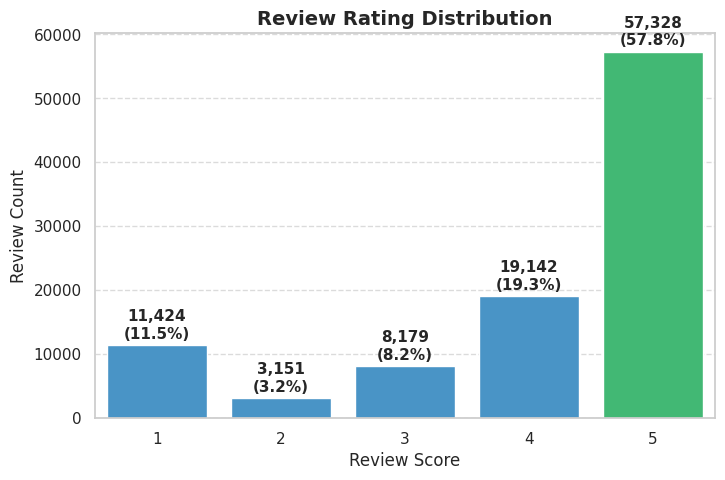

In [ ]:
# Menghitung distribusi rating
rating_counts = reviews_df['review_score'].value_counts().sort_index()
rating_percentage = (rating_counts / rating_counts.sum()) * 100  # Menghitung persentase

# Konversi ke DataFrame untuk kemudahan plotting
df_ratings = rating_counts.reset_index()
df_ratings.columns = ['Review Score', 'Review Count']

# Warna yang berbeda hanya untuk skor tertinggi
colors = ['#3498db' if score != 5 else '#2ecc71' for score in df_ratings['Review Score']]  # Biru untuk 1-4, hijau untuk 5

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_ratings['Review Score'], y=df_ratings['Review Count'], palette=colors)

# Tambahkan label jumlah ulasan dan persentase di atas batang
for i, (value, percent) in enumerate(zip(df_ratings['Review Count'], rating_percentage)):
    ax.text(i, value + 1000, f"{value:,}\n({percent:.1f}%)", ha='center', fontsize=11, fontweight='bold')

# Judul dan label
plt.title('Review Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Review Count', fontsize=12)

# Tambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

### Pertanyaan 6: Apakah ada hubungan antara harga produk dan jumlah unit yang terjual?

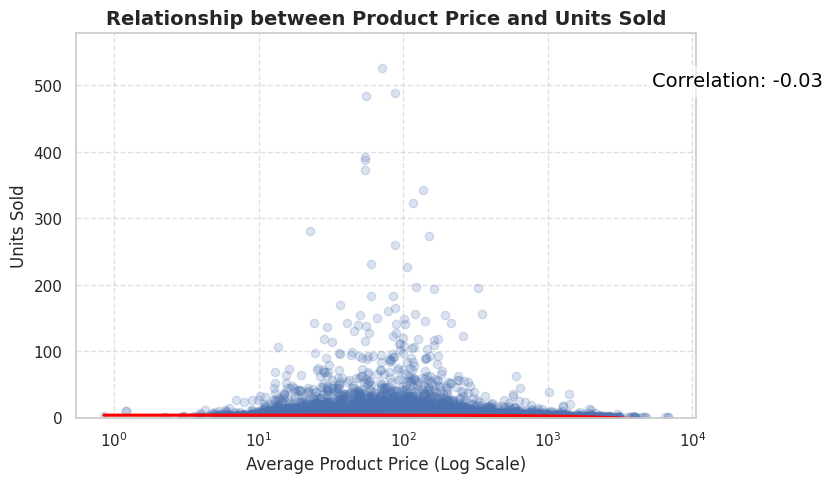

In [ ]:
# Membuat figure
plt.figure(figsize=(8, 5))

# Scatter plot dengan regresi
sns.regplot(x=product_sales['avg_price'],
            y=product_sales['units_sold'],
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'red'})

# Menggunakan skala logaritmik untuk harga
plt.xscale('log')

# Judul dan label
plt.title('Relationship between Product Price and Units Sold', fontsize=14, fontweight='bold')
plt.xlabel('Average Product Price (Log Scale)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)

# Menampilkan grid
plt.grid(True, linestyle='--', alpha=0.6)

# Menampilkan korelasi dengan posisi lebih rapi
correlation_value = product_sales[['avg_price', 'units_sold']].corr().iloc[0, 1]
plt.text(plt.xlim()[1] * 0.5, plt.ylim()[1] * 0.9,
         f'Correlation: {correlation_value:.2f}',
         fontsize=14, color='black', bbox=dict(facecolor='white', alpha=0.6))

# Atur batas sumbu Y agar lebih proporsional
plt.ylim(0, max(product_sales['units_sold']) * 1.1)

# Tampilkan plot
plt.show()

### Pertanyaan 7: Bagaimana sebaran geografis pelanggan berdasarkan kota dan negara bagian?

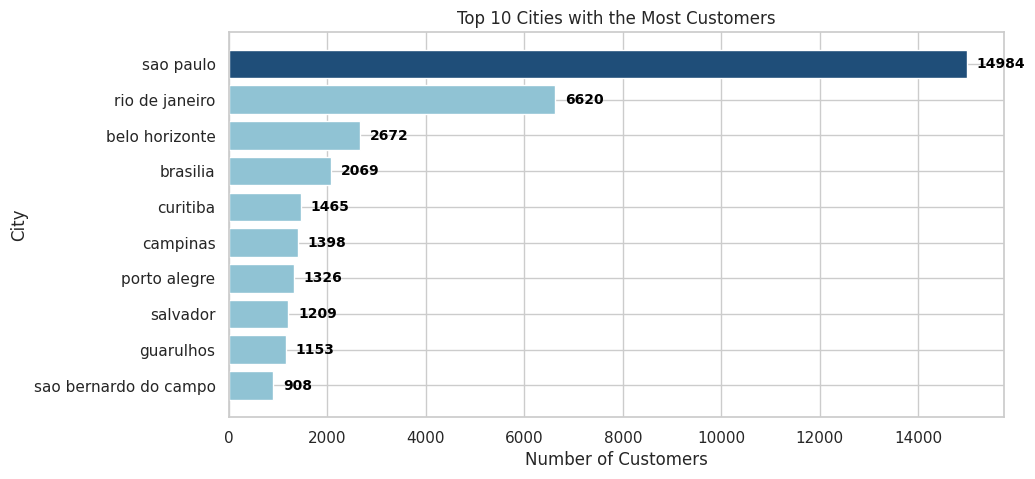

In [ ]:
# Sort data dan ambil 10 kota dengan pelanggan terbanyak
top_cities = customer_geo_distribution.sort_values(by='total_customers', ascending=False).head(10)

# Warna bar: kota dengan jumlah pelanggan tertinggi lebih gelap, sisanya lebih muda
colors = ['#1f4e79' if i == 0 else '#90c3d4' for i in range(len(top_cities))]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(top_cities['customer_city'], top_cities['total_customers'], color=colors)

# Tambahkan label angka di ujung bar dengan sedikit jarak
for bar, value in zip(bars, top_cities['total_customers']):
    plt.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2, str(value),
             va='center', fontsize=10, fontweight='bold', color='black')

# Judul dan label
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Customers")

# Balik sumbu agar ranking terlihat dari atas ke bawah
plt.gca().invert_yaxis()

plt.show()

**Insight:**
- Tren Pesanan Bulanan: Ada pola musiman dengan lonjakan pesanan di bulan tertentu. Bisa dimanfaatkan untuk strategi promosi.
- Kategori Produk Terlaris & Terendah: Produk tertentu mendominasi penjualan. Fokuskan pemasaran pada kategori populer dan evaluasi kategori yang kurang laku.
- Metode Pembayaran: Pelanggan cenderung memilih metode tertentu. Pastikan opsi pembayaran yang populer selalu tersedia.
- Waktu Pengiriman: Jika pengiriman bervariasi atau terlalu lama, evaluasi sistem logistik agar lebih efisien.
- Distribusi Rating Pelanggan: Jika banyak rating rendah, analisis penyebabnya (kualitas produk, pengiriman, atau layanan pelanggan).
- Hubungan Harga & Penjualan: Tidak ada hubungan signifikan antara harga dan jumlah unit terjual, jadi strategi penetapan harga perlu mempertimbangkan faktor lain.
- Sebaran Geografis Pelanggan: Konsentrasi pelanggan terbesar ada di kota tertentu. Fokus pemasaran dan ekspansi ke kota-kota dengan potensi tinggi.

## Analisis Lanjutan (Opsional)

In [ ]:
#all_df.to_csv("all_data.csv", index=False)

#!cp all_data.csv "/content/drive/MyDrive/all_data.csv"

IndentationError: unexpected indent (<ipython-input-97-a7180ca398c5>, line 5)

## Conclusion

1️⃣Tren Pesanan Bulanan:
Secara keseluruhan, jumlah pesanan menunjukkan tren peningkatan yang sangat kuat dari akhir 2016 hingga awal 2018, dengan puncak lebih dari 7.000 pesanan per bulan. Stabilitas terjadi sepanjang 2018, dengan jumlah pesanan tetap tinggi. Namun, terjadi anomali penurunan drastis di akhir 2018, yang perlu dianalisis lebih lanjut untuk mengetahui penyebabnya.

2️⃣ Kategori Produk Terlaris & Terendah:
Kategori dengan penjualan tertinggi adalah "belezza_saude" dengan sekitar 3.500 unit terjual, menunjukkan permintaan tinggi terhadap produk kecantikan dan kesehatan. Kategori dengan penjualan terendah adalah "fashion_esporte" dengan hanya 1 unit terjual, menunjukkan sangat rendahnya permintaan terhadap produk pakaian olahraga. Perbedaan antara kategori dengan penjualan tertinggi dan terendah sangat signifikan, dengan perbedaan lebih dari 3.499 unit.

3️⃣ Pola Metode Pembayaran:
Credit card adalah metode pembayaran utama dengan dominasi sebesar 75,0% dari total transaksi. Ini menandakan bahwa pelanggan lebih nyaman menggunakan kartu kredit dibandingkan metode lain. Boleto merupakan metode pembayaran kedua yang cukup signifikan dengan 19,3% transaksi. Ini bisa menjadi alternatif bagi pelanggan yang tidak menggunakan kartu kredit. Voucher hanya digunakan dalam 5,6% transaksi, menjadikannya metode yang paling jarang digunakan.

4️⃣ Rata-rata Waktu Pengiriman:
Rata-rata waktu pengiriman adalah 12,09 hari, dengan batas maksimum 29 hari. Mayoritas pesanan tiba dalam waktu yang wajar, tetapi beberapa mungkin mengalami keterlambatan. Diperlukan strategi optimasi pengiriman untuk mempercepat proses dan meningkatkan kepuasan pelanggan.

5️⃣ Distribusi Rating Ulasan:
Mayoritas pelanggan puas, dengan 57,8% memberikan rating 5 dan 19,3% memberikan rating 4. Sekitar 11,5% pelanggan sangat tidak puas, memberikan rating 1, yang menunjukkan ada beberapa aspek layanan atau produk yang perlu diperbaiki.
Sebaran ulasan cenderung positif, tetapi masih ada sekitar 22,9% ulasan yang memberikan rating 3 ke bawah. Langkah perbaikan dapat difokuskan pada peningkatan kualitas produk, layanan pelanggan, dan pengalaman pengguna untuk mengurangi jumlah rating rendah.

6️⃣ Hubungan Harga & Jumlah Unit Terjual:
Tidak ada hubungan yang kuat antara harga produk dan jumlah unit yang terjual, berdasarkan nilai korelasi -0.03. Produk dengan harga lebih rendah cenderung lebih sering dibeli, tetapi tidak semua produk murah memiliki penjualan tinggi.
Produk dengan harga tinggi memiliki volume penjualan lebih rendah, tetapi ada beberapa pengecualian di mana produk mahal tetap laku terjual dalam jumlah banyak. Faktor lain seperti brand, kualitas produk, promosi, dan permintaan pasar kemungkinan lebih berpengaruh terhadap jumlah penjualan daripada harga itu sendiri.

7️⃣ Sebaran Geografis Pelanggan:
Kota São Paulo menjadi pusat utama pelanggan, dengan jumlah yang jauh lebih tinggi dibandingkan kota lainnya. Kota besar seperti Rio de Janeiro dan Belo Horizonte juga memiliki jumlah pelanggan yang cukup signifikan. Sebaran pelanggan cenderung terkonsentrasi di kota-kota metropolitan yang memiliki infrastruktur dan akses e-commerce yang lebih baik. Untuk strategi bisnis, fokus pemasaran dan logistik di kota-kota besar ini dapat menjadi kunci dalam meningkatkan jangkauan pelanggan dan meningkatkan efisiensi pengiriman produk.